In [1]:
import warnings  #evitar warnings
import pandas as pd  #trabajar tablas y estructuras de datos
from pandas import ExcelWriter 
from pandas import ExcelFile
from pandas import datetime
from pandas import DataFrame
import numpy as np #vectores y matrices multidimensiones y operaciones complejas
import matplotlib.pyplot as plt  #para trabajar graficos
from openpyxl import Workbook #en caso de ser necesario instalar la libreria openpyxl y workbook para excel
import statsmodels.api as sm  #explorar modelos estadisticos
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose #descomposición de la serie
from sklearn.metrics import mean_squared_error, mean_absolute_error #biblioteca de aprendizaje automatico
from sklearn.model_selection import train_test_split
from math import sqrt #operaciones matematicas 
from tkinter import filedialog #tkinter trabaja ambiente grafico
import pmdarima as pm #autoarima... se debe de instalar pip install pmdarima
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta #pip install python-dateutil


/var/folders/dm/bzfhlzk90374nx5vf5sn63lh0000gn/T/ipykernel_38126/2917618333.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
print (pm.__version__)

2.0.2


In [3]:
warnings.filterwarnings("ignore")
#variables para cambiar en el modelo 
tiempo_pronosticar=12 #ventana de tiempo a pronosticar
tren='add' #tendencia aditiva
seas='mul' #estacionalidad multiplicativa
filename =  filedialog.askopenfilename(initialdir = "/",title = "Seleccione el archivo",filetypes = (("Archivos CSV","*.xlsx"),("Todos los Archivos","*.*")))

In [4]:
df = pd.read_excel(filename, sheet_name='Hoja1') #Modificar en caso de cambiar nombre de hoja
df.info()
df.head(12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        48 non-null     datetime64[ns]
 1   Facturacion  48 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 896.0 bytes


,FECHA,Facturacion
0,2015-01-01,101684
1,2015-02-01,82712
2,2015-03-01,94665
3,2015-04-01,91333
4,2015-05-01,97133
5,2015-06-01,98733
6,2015-07-01,104260
7,2015-08-01,92082
8,2015-09-01,99904
9,2015-10-01,98733


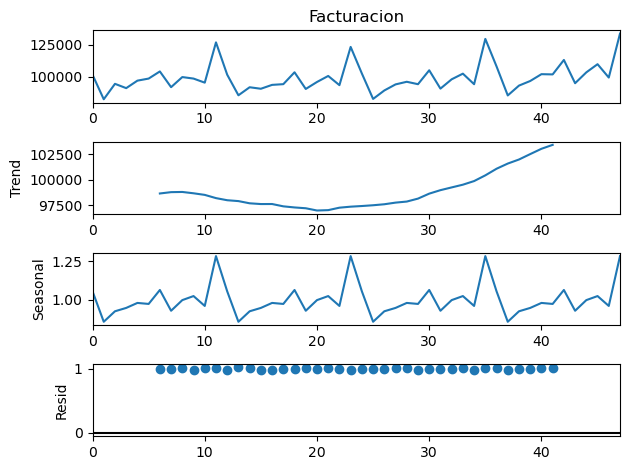

In [7]:
#descomposición de la serie de tiempo, importante la frecuencia
result = seasonal_decompose(df.iloc[:, 1], model=seas, period=12)
result.plot()
plt.show()

In [8]:
#Convertir la fecha en un formato pandas 
df.Timestamp = pd.to_datetime (df.iloc[:, 0], format = "%d/%m/%Y") #indexa la fecha, le da formato
df.index = df.Timestamp
df.head(10)

#df.iloc[:,0] tomo la primera columna, es esquivalente a decir df.FECHAS 



,FECHA,Facturacion
FECHA,,
2015-01-01,2015-01-01,101684
2015-02-01,2015-02-01,82712
2015-03-01,2015-03-01,94665
2015-04-01,2015-04-01,91333
2015-05-01,2015-05-01,97133
2015-06-01,2015-06-01,98733
2015-07-01,2015-07-01,104260
2015-08-01,2015-08-01,92082
2015-09-01,2015-09-01,99904


In [9]:
#separación de set de datos, entrenamiento y test

df1=df.iloc[:, 1] #copia de la columna facturación, es equivalente a df.facturacion
#y tiene los valores de facturación
#X tiene los valores de fecha

train=df[0:int(0.9*(len(df)))] #entrenamiento
test=df[int(0.9*(len(df))):]  #test



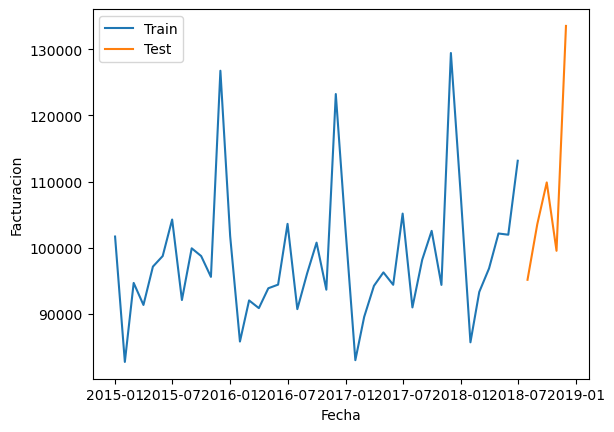

In [10]:
#Graficando la data

plt.plot(train.iloc[:, 1], label='Train') #grafica los valores de entrenamiento
plt.plot(test.iloc[:, 1], label='Test') #grafica los valores del test
plt.legend(loc='best')
plt.xlabel('Fecha') #colocar el nombre de las variables
plt.ylabel('Facturacion')
plt.show()

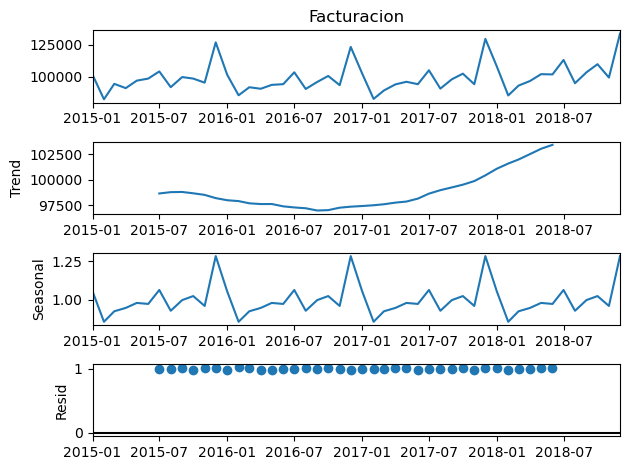

In [12]:
result = seasonal_decompose(df.iloc[:, 1], model=seas, period=12)  #descomposición de la serie de tiempo, importante la frecuencia
result.plot()
plt.show()

In [13]:
#METODO DE HOLT-WINTERS

HW = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train.iloc[:, 1]) ,seasonal_periods=12 ,trend= tren, seasonal=seas).fit()
HW['Holt_Winter'] = fit1.forecast(len(test))

print ('Metricas de Validación HoltWinter')
print('MAPE: ',np.mean(np.abs((test.iloc[:, 1] - HW.Holt_Winter) / test.iloc[:, 1])) * 100)
print('MAE:', mean_absolute_error(test.iloc[:, 1], HW.Holt_Winter))
print('RMSE: ',sqrt(mean_squared_error(test.iloc[:, 1], HW.Holt_Winter)))
print('MSE: ',(mean_squared_error(test.iloc[:, 1], HW.Holt_Winter)))



Metricas de Validación HoltWinter
MAPE:  3.514982870406732
MAE: 3818.8054252945612
RMSE:  4409.439325935855
MSE:  19443155.16910965


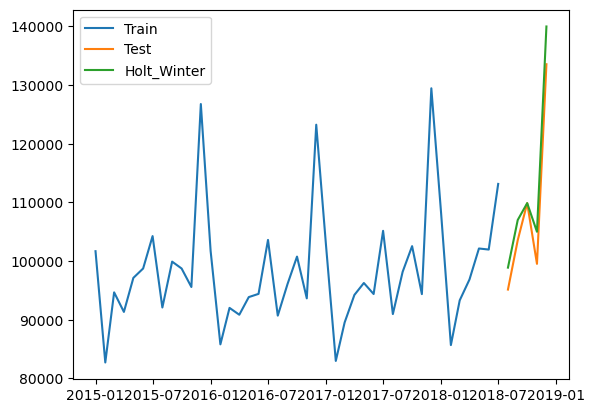

In [14]:
#GRÁFICOS HOLTWINTER
plt.plot(train.iloc[:, 1], label='Train')
plt.plot(test.iloc[:, 1], label='Test')
plt.plot(HW.Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=585.221, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=594.836, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=594.263, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=591.111, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=595.889, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=603.879, Time=0.05 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=582.183, Time=0.43 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=586.767, Time=0.10 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=579.609, Time=0.95 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=578.694, Time=0.50 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=593.198, Time=0.20 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=595.605, Time=0.13 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=579.774, Time=0.84 sec
 ARIMA(1,0,2)(2,1,0)[12] intercept   : AIC=580.414, Time=0.29 sec
 ARIMA(0,0,0)(2,1,0)[12] intercep

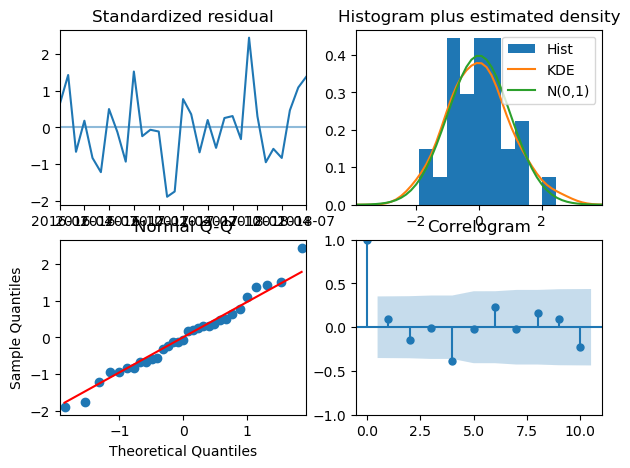

In [15]:
#MÉTODO SARIMA AUTOCALIBRACIÓN

model = pm.auto_arima(train.iloc[:, 1], start_p=1, start_q=1,
                         test='adf', #prueba test Fuller
                         max_p=9, max_q=9, m=12, #se pueden cambiar p y q #M es la frecuencia
                         start_P=0, seasonal=True, #componente estacional
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(7,5))
plt.show()


In [16]:
#PROYECCIÓN SARIMA

SA = test.copy()

model.fit(train.iloc[:, 1])
SA['SARIMA'] = model.predict(n_periods=len(test))

print ('Metricas de Validación SARIMA')
print('MAPE: ',np.mean(np.abs((test.iloc[:, 1] - SA.SARIMA) / test.iloc[:, 1])) * 100)
print('MAE:', mean_absolute_error(test.iloc[:, 1], SA.SARIMA))
print('RMSE: ',sqrt(mean_squared_error(test.iloc[:, 1], SA.SARIMA)))
print('MSE: ',(mean_squared_error(test.iloc[:, 1], SA.SARIMA)))

#METODO DE HOLT-WINTERS



Metricas de Validación SARIMA
MAPE:  0.8694095872885653
MAE: 934.7835006742447
RMSE:  1301.3962730751769
MSE:  1693632.2595739602


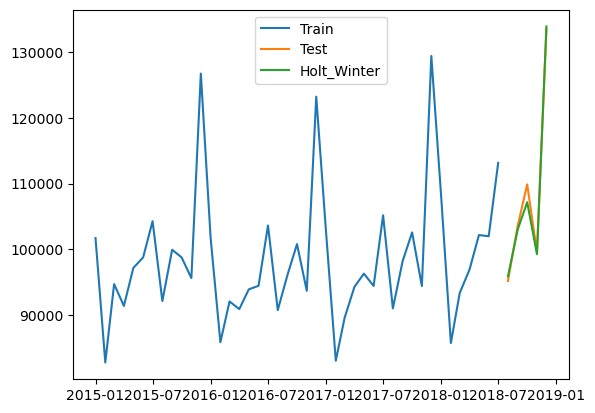

In [17]:
#GRÁFICOS SARIMA
plt.plot(train.iloc[:, 1], label='Train')
plt.plot(test.iloc[:, 1], label='Test')
plt.plot(SA.SARIMA, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [18]:
#Crear proyecciones Holtwinter

fit_1 = ExponentialSmoothing((df1) ,seasonal_periods=12 ,trend=tren, seasonal=seas).fit()
HW_forcast = fit_1.forecast(tiempo_pronosticar)
print('Proyecciones HoltWinter')
HW_forcast.head(100)

Proyecciones HoltWinter


2019-01-01    111833.938628
2019-02-01     91190.833138
2019-03-01     98690.136161
2019-04-01    101306.634843
2019-05-01    105071.830042
2019-06-01    104671.759668
2019-07-01    114728.151221
2019-08-01    100488.063777
2019-09-01    108264.876629
2019-10-01    111424.363260
2019-11-01    104761.805845
2019-12-01    140396.071578
Freq: MS, dtype: float64

In [19]:
#pronosticar Autosarima
models = pm.auto_arima(df.iloc[:, 1], start_p=1, start_q=1,
                         test='adf', #prueba test Fuller
                         max_p=9, max_q=9, m=12, #se pueden cambiar p y q #M es la frecuencia
                         start_P=0, seasonal=True, #componente estacional
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


fecha=df.index[-1]+ relativedelta(months=1)
AS_forcast2 = models.predict(n_periods=tiempo_pronosticar)
indexar_fecha = pd.date_range(fecha, periods = tiempo_pronosticar, freq='MS')
AS_forcast = pd.Series(AS_forcast2, index=indexar_fecha)
print('Proyecciones SARIMA')
AS_forcast.head(100)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=692.401, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=697.125, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=685.332, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=697.855, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=694.350, Time=0.01 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=684.458, Time=0.24 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=685.781, Time=0.03 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=683.053, Time=0.64 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=687.616, Time=0.47 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=679.485, Time=0.94 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=682.706, Time=0.44 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,0,2)(2,1,2)[12] intercept   : AIC=in

2019-01-01    112733.400323
2019-02-01     90652.098264
2019-03-01     98176.724088
2019-04-01    101559.633392
2019-05-01    106629.974459
2019-06-01    106425.075656
2019-07-01    117512.572577
2019-08-01     99857.933006
2019-09-01    108096.833499
2019-10-01    114275.589304
2019-11-01    104146.072215
2019-12-01    138007.285495
Freq: MS, dtype: float64

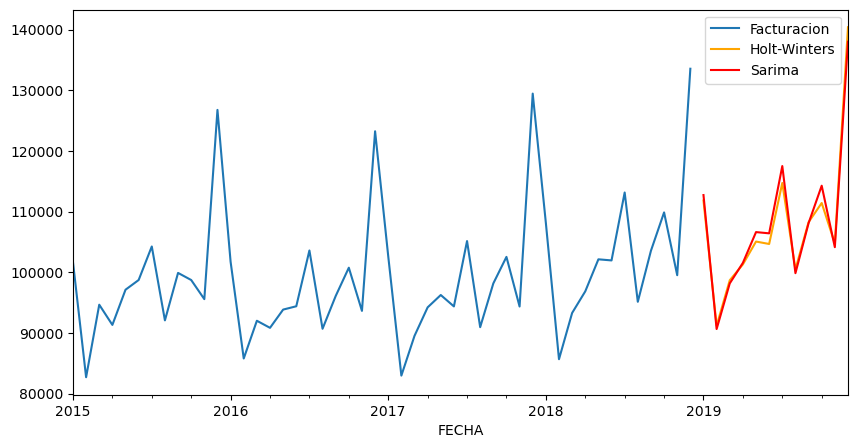

In [20]:
df1.plot(kind="line",figsize=(10,5),legend=True)
HW_forcast.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='Holt-Winters')
AS_forcast.plot(kind="line",figsize=(10,5),color='red',legend=True,label='Sarima')
plt.show()

